# Best place for a souvenir shop in Copacabana 



# Introduction


Copacabana with its world-famous beach attracts a large amount of tourists all year round. In addition, there are different events that contribute to further increase the capacity of hotels at certain times of the year.


So, combining tourist relevance with all the bohemian air that surrounds this neighborhood, a group of artistic artists expressed an interest in opening a business in Copacabana. As this we have the question to be solved: What is the best place to open a souvenir shop in Copacabana?


During the bussiness understanding stage, the specifics of the business and the desire of new entrepreneurs became clear.


The new establishment will sell products made by the store owners. These pieces have a differentiated design which ends up leading to an increase in the price of the products. Thus, it is not necessary to take into account the number of stores that already exist in the same industry as they will not be competitors.


We noticed a large concentration of tourists in the vicinity of the hotels, with that we opted for the machine learn k-means to group the hotels and thus, check the surroundings where the hotels are more concentrated.
Hotel data will be collected through Foursquare which is a web service based on geo-location. This service provides various information about the location searched. After collecting, cleaning and filtering the data, we noticed that there is a rating for each hotel. This ranking of hotels should attract a greater number of tourists to the hotel that is best rated.


The objective of the project is to define the surroundings where there is a greater concentration of hotels, in addition to this, we will evaluate the averages of the marks awarded in each group of hotels.

#### Importing libraries 

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 81kB 3.8MB/s 
  Created wheel for folium: filename=folium-0.5.0-cp37-none-any.whl size=76240 sha256=e093e634456431aa4d3d2fed4ce17487c38215fd15224c8adec8335f88168cab
  Stored in directory: /root/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.5.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
Folium installed
Libraries imported.


# Load the data

### Venues Data from Foursquare API

It is necessary to make a previous registration on the Foursquare website to have access to the information of the API. After this procedure, personal credentials such as: CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN

#### Search for a specific venue category


> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**


#### Latitude and longitude coordinates from an address

In [ ]:
address = 'R. Domingos Ferreira, 6 Copacabana, Rio de Janeiro, RJ'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.9721962 -43.1865848


#### Defining the corresponding URL


In [ ]:
# Parameters
CLIENT_ID = # your Foursquare ID
CLIENT_SECRET = # your Foursquare Secret
ACCESS_TOKEN =  # your FourSquare Access Token
VERSION = '20180604'

search_query = 'Hotel'
radius = 2000
LIMIT = 100


In [ ]:
# GET Response from Foursquare API
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
                                                                                                                                                   CLIENT_ID, 
                                                                                                                                                   CLIENT_SECRET,
                                                                                                                                                   latitude, 
                                                                                                                                                   longitude,
                                                                                                                                                   ACCESS_TOKEN, 
                                                                                                                                                   VERSION, 
                                                                                                                                                   search_query, 
                                                                                                                                                   radius, 
                                                                                                                                                   LIMIT)


In [ ]:
# make the GET request
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6085570b93d76957ffab6b92'},
 'notifications': [{'item': {'unreadCount': 0}, 'type': 'notificationTray'}],
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'primary': True,
      'shortName': 'Hotel'}],
    'hasPerk': False,
    'id': '4b058720f964a520128122e3',
    'location': {'address': 'Av. Atlântica, 2600',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'country': 'Brasil',
     'distance': 76,
     'formattedAddress': ['Av. Atlântica, 2600',
      'Rio de Janeiro, RJ',
      '22041-001'],
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.9722307,
       'lng': -43.1858418}],
     'lat': -22.9722307,
     'lng': -43.1858418,
     'postalCode': '22041-001',
     'state': 'RJ'},
    'name': 'JW Marriott Hotel Rio de Janeiro',
    'referral

# Pre-processing (Knowledge of data)

#### Turning data into pandas dataframe


In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet,location.neighborhood
0,4b058720f964a520128122e3,JW Marriott Hotel Rio de Janeiro,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1619351307,False,"Av. Atlântica, 2600",-22.972231,-43.185842,"[{'label': 'display', 'lat': -22.9722307, 'lng...",76,22041-001,BR,Rio de Janeiro,RJ,Brasil,"[Av. Atlântica, 2600, Rio de Janeiro, RJ, 2204...",182987381,NaN,NaN
1,4bf3fa3dcad2c928b0589b99,Grande Hotel Canadá,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1619351307,False,"Av. N.Sa. de Copacabana, 687",-22.971394,-43.187073,"[{'label': 'display', 'lat': -22.9713937055088...",102,22050-002,BR,Rio de Janeiro,RJ,Brasil,"[Av. N.Sa. de Copacabana, 687, Rio de Janeiro,...",NaN,NaN,NaN
2,4f084d40e4b0a2229aaa3317,Olinda Rio Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1619351307,False,"Av. Atlântica, 2230",-22.970240,-43.182959,"[{'label': 'display', 'lat': -22.970240013094,...",430,22041-001,BR,Rio de Janeiro,RJ,Brasil,"[Av. Atlântica, 2230, Rio de Janeiro, RJ, 2204...",82767632,NaN,NaN
3,4b058720f964a520048122e3,Majestic Rio Palace Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1619351307,False,"R. Cinco de Julho, 195",-22.971066,-43.190163,"[{'label': 'display', 'lat': -22.9710658865429...",387,22051-030,BR,Rio de Janeiro,RJ,Brasil,"[R. Cinco de Julho, 195, Rio de Janeiro, RJ, 2...",NaN,NaN,NaN
4,4b0fe5faf964a520026623e3,Hotel Astoria Palace,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1619351307,False,"Av. Atlantica, 1866",-22.968334,-43.180009,"[{'label': 'display', 'lat': -22.9683339187639...",799,22021-001,BR,Rio de Janeiro,RJ,Brasil,"[Av. Atlantica, 1866, Rio de Janeiro, RJ, 2202...",NaN,NaN,NaN


In [ ]:
dataframe.shape

(50, 19)

In [ ]:
# keep only columns
filtered_columns = ['id', 'name', 'categories', 'location.address', 'location.lat', 'location.lng']
df_copacabana = dataframe.loc[:, filtered_columns]
df_copacabana = df_copacabana.rename(columns={'location.address':'address', 'location.lat':'hotelLatitude', 'location.lng':'hotelLongitude'})
df_copacabana.head()

,id,name,categories,address,hotelLatitude,hotelLongitude
0,4b058720f964a520128122e3,JW Marriott Hotel Rio de Janeiro,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","Av. Atlântica, 2600",-22.972231,-43.185842
1,4bf3fa3dcad2c928b0589b99,Grande Hotel Canadá,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","Av. N.Sa. de Copacabana, 687",-22.971394,-43.187073
2,4f084d40e4b0a2229aaa3317,Olinda Rio Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","Av. Atlântica, 2230",-22.970240,-43.182959
3,4b058720f964a520048122e3,Majestic Rio Palace Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","R. Cinco de Julho, 195",-22.971066,-43.190163
4,4b0fe5faf964a520026623e3,Hotel Astoria Palace,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","Av. Atlantica, 1866",-22.968334,-43.180009


# Visualization of data

In [ ]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Windsor Palace Hotel

# add a red circle marker to represent Windsor Palace Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Windsor Palace Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the others hotels as blue circle markers
for lat, lon, name in zip(df_copacabana['hotelLatitude'],df_copacabana['hotelLongitude'], df_copacabana['name']):
    label=folium.Popup(str(name), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Data cleaning and filtering

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_copacabana['categories'] = df_copacabana.apply(get_category_type, axis=1)
df_copacabana.head()

,id,name,categories,address,hotelLatitude,hotelLongitude
0,4b058720f964a520128122e3,JW Marriott Hotel Rio de Janeiro,Hotel,"Av. Atlântica, 2600",-22.972231,-43.185842
1,4bf3fa3dcad2c928b0589b99,Grande Hotel Canadá,Hotel,"Av. N.Sa. de Copacabana, 687",-22.971394,-43.187073
2,4f084d40e4b0a2229aaa3317,Olinda Rio Hotel,Hotel,"Av. Atlântica, 2230",-22.970240,-43.182959
3,4b058720f964a520048122e3,Majestic Rio Palace Hotel,Hotel,"R. Cinco de Julho, 195",-22.971066,-43.190163
4,4b0fe5faf964a520026623e3,Hotel Astoria Palace,Hotel,"Av. Atlantica, 1866",-22.968334,-43.180009


In [ ]:
# checking if the categories only have hotels
df_copacabana['categories'].value_counts()

Hotel                    47
Vacation Rental           1
General Entertainment     1
Resort                    1
Name: categories, dtype: int64

In [ ]:
# Removing the hotel that is not located in Copacabana
df_copacabana = df_copacabana.drop(df_copacabana[df_copacabana['id'] == '51c4cd01498e40dc8e2cefaf'].index)

In [ ]:
# Creating a list of hotel notes
list_id = df_copacabana['id'].to_list()
list_rating =[]

for id in list_id:
  url_id = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
  results_idHotel = requests.get(url_id).json()
  try:
    list_rating.append(results_idHotel['response']['venue']['rating'])
  except:
    list_rating.append('NaN')
    pass


In [ ]:
# The Foursquere user has limitations for use, so the result was stored in a txt file
with open("nota.txt", 'w') as f:
    for s in list_rating:
        f.write(str(s) + '\n')

In [ ]:
# Reading the hotel notes file
with open("/content/nota.txt", 'r') as f:
    list_rating = [line.rstrip('\n') for line in f]


In [ ]:
# Includes the rating column in the dataframe
df_copacabana['rating']=list_rating
df_copacabana.head()

,id,name,categories,address,hotelLatitude,hotelLongitude,rating
0,4b058720f964a520128122e3,JW Marriott Hotel Rio de Janeiro,Hotel,"Av. Atlântica, 2600",-22.972231,-43.185842,8.0
1,4bf3fa3dcad2c928b0589b99,Grande Hotel Canadá,Hotel,"Av. N.Sa. de Copacabana, 687",-22.971394,-43.187073,6.3
2,4f084d40e4b0a2229aaa3317,Olinda Rio Hotel,Hotel,"Av. Atlântica, 2230",-22.970240,-43.182959,6.6
3,4b058720f964a520048122e3,Majestic Rio Palace Hotel,Hotel,"R. Cinco de Julho, 195",-22.971066,-43.190163,6.6
4,4b0fe5faf964a520026623e3,Hotel Astoria Palace,Hotel,"Av. Atlantica, 1866",-22.968334,-43.180009,6.7


In [ ]:
df_copacabana.dtypes

id                 object
name               object
categories         object
address            object
hotelLatitude     float64
hotelLongitude    float64
rating             object
dtype: object

In [ ]:
# Replace missing notes with information obtained from hotel review sites
df_copacabana.loc[df_copacabana.id == '4bc7973493bdeee14b8a37ae','rating']= "8.4"
df_copacabana.loc[df_copacabana.id == '5060d77be4b06cf1a1d9efd7','rating']= "8.8"
df_copacabana.loc[df_copacabana.id == '4cec5e6c5de16ea8274bb096','rating']= "6.2"
df_copacabana.loc[df_copacabana.id == '56f4b434498e9337d2fcd720','rating']= "9.0"
df_copacabana.loc[df_copacabana.id == '5076469fe4b0c5298f005dba','rating']= "7.5"

In [ ]:
# Changing the data type of the rating column
df_copacabana['rating'] = df_copacabana['rating'].apply(pd.to_numeric)

In [ ]:
df_copacabana.dtypes

id                 object
name               object
categories         object
address            object
hotelLatitude     float64
hotelLongitude    float64
rating            float64
dtype: object

# Implementation - K-Means

# Elbow metric

In [ ]:
# Dataframes with information on latitude and longitude coordinates only
property_clustering = df_copacabana.drop(['id', 'name', 'categories', 'address', 'rating'],axis=1)
property_clustering.head()

,hotelLatitude,hotelLongitude
0,-22.972231,-43.185842
1,-22.971394,-43.187073
2,-22.970240,-43.182959
3,-22.971066,-43.190163
4,-22.968334,-43.180009


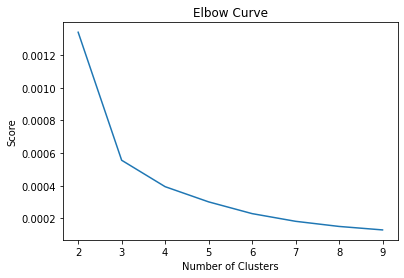

In [ ]:
#Elbow metric
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

score = [kmeans[i].fit(property_clustering).inertia_ for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


# Silhouette metric

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(property_clustering)
  labels_ = kmeans_.labels_
  coef = silhouette_score(property_clustering, labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 2, score: 0.549036361999293
N_cluster: 3, score: 0.5643626180588275
N_cluster: 4, score: 0.47304941859098404
N_cluster: 5, score: 0.4554272888997614
N_cluster: 6, score: 0.4532426401910072
N_cluster: 7, score: 0.44395633051693745
N_cluster: 8, score: 0.449405708316624
N_cluster: 9, score: 0.471616907685547


## K-Means

In [ ]:
#Criando mais uma coluna com os labels de clusters
k=3

kmeans = KMeans(n_clusters = k, init = 'random', n_init = 100, max_iter = 300, random_state=123).fit(property_clustering)

df_copacabana.insert(0, 'Cluster Labels', kmeans.labels_)
df_copacabana.head()

,Cluster Labels,id,name,categories,address,hotelLatitude,hotelLongitude,rating
0,2,4b058720f964a520128122e3,JW Marriott Hotel Rio de Janeiro,Hotel,"Av. Atlântica, 2600",-22.972231,-43.185842,8.0
1,2,4bf3fa3dcad2c928b0589b99,Grande Hotel Canadá,Hotel,"Av. N.Sa. de Copacabana, 687",-22.971394,-43.187073,6.3
2,2,4f084d40e4b0a2229aaa3317,Olinda Rio Hotel,Hotel,"Av. Atlântica, 2230",-22.970240,-43.182959,6.6
3,2,4b058720f964a520048122e3,Majestic Rio Palace Hotel,Hotel,"R. Cinco de Julho, 195",-22.971066,-43.190163,6.6
4,0,4b0fe5faf964a520026623e3,Hotel Astoria Palace,Hotel,"Av. Atlantica, 1866",-22.968334,-43.180009,6.7


# Analysis of Clusters

The project aims to determine the best place for the opening of the souvenir shop. Through the k-means clustering method, the hotels were grouped in order to define a greater concentration of hotels and to evaluate the averages of the marks attributed to the hotels of each cluster.


Copacabana hotels were grouped into three clusters. Two of these clusters had a similar concentration of hotels. Another cluster, represented in yellow on the map below, represents more than twice the number of hotels compared to the other clusters. The best choice for the installation of the new trade was evidenced in this cluster (yellow color on the map).


Analyzing the average hotel scores by cluster, we noticed that cluster 1 (black on the map) presents a concentration of hotels that are better evaluated than the others. A greater difference is perceived if we compare the results of cluster 1 (black) and cluster 0 (blue).


The choice of the location of the new store is undoubtedly in cluster 2 due to its greater concentration of hotels in its surroundings.


The average of the grades ended up not being a relevant data for choosing the location of the store.




### Count of hotels by clusters 

In [ ]:
df_copacabana.groupby(['Cluster Labels'])['id'].count()

Cluster Labels
0    12
1    12
2    25
Name: id, dtype: int64

### Average hotel scores by clusters 

In [ ]:
df_copacabana.groupby(['Cluster Labels'])['rating'].mean()

Cluster Labels
0    6.433333
1    7.400000
2    6.928000
Name: rating, dtype: float64

# Visualization of hotels clusters in Copacabana 

In [ ]:
colors={0:'blue',1:'black',2:'yellow',3:'green'}
map_copacabana = folium.Map(location=[latitude, longitude],zoom_start=10)

for lat, lon, name, clusters in zip(df_copacabana['hotelLatitude'],df_copacabana['hotelLongitude'], df_copacabana['name'], df_copacabana['Cluster Labels']):
   # label = '{}, Cluster {}'.format(name, clusters)
    label=folium.Popup(str(name) + ', Cluster: ' + str(clusters), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        color=colors[clusters],
        fill_color= colors[clusters],
        fill_opacity=0.5
        ).add_to(map_copacabana)

map_copacabana